<div align="center"><a href="https://colab.research.google.com/github/deepkapha/EarthScanWebinar/blob/main/notebook/W2W_dataset_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></div>

<center><font size="10">Notebook Outline</font></center>

1. **Import Libraries**: In this section, the necessary Python libraries are imported that will be used throughout the notebook.

2. **Download Dataset**: This section involves downloading the dataset from a publicly available Google Drive link.

3. **Dataset Description**: This section provides a brief description of the dataset that has been downloaded, including its source and format.

4. **Exploratory Data Analysis (EDA)**: In this section, the data is analyzed to understand its underlying characteristics. This is an important step in any data analysis project, as it helps to identify patterns, anomalies, and other insights that can inform subsequent analysis.

5. **Data Preprocessing**: Once the dataset has been explored, this section involves cleaning and preparing the data for analysis. This may involve handling missing values, or other transformations necessary to ensure that the data is in the appropriate format for analysis.

6. **Generating Dataset**: Finally, in this section, the preprocessed data is used to generate a new dataset that can be used for modeling or other purposes.

In [2]:
!pip install matplotlib==3.6.3


<center><font size="10">You will need to restart the kernel now!!!</font></center>

In [3]:
!pip install --upgrade --no-cache-dir gdown

In [1]:
import sys 
sys.path.append('..')

# 1. Import the necessaary libraries

In [2]:
import os

In [3]:
# this cell runs only if you're using "Open in Colab badge directly from GitHub instead of cloning the Repo or don't have dependencies from ../utils folder"
if not os.path.isdir('../data'):
    !curl -OL https://raw.githubusercontent.com/deepkapha/EarthScanWebinar/main/utils/preprocessing.py
    !curl -OL https://raw.githubusercontent.com/deepkapha/EarthScanWebinar/main/utils/data_generate.py
    !curl -OL https://raw.githubusercontent.com/deepkapha/EarthScanWebinar/main/utils/plot_utils.py
    !curl -OL https://raw.githubusercontent.com/deepkapha/EarthScanWebinar/main/utils/well_log_plots.py

    !mkdir utils

    !mv data_generate.py utils/data_generate.py
    !mv plot_utils.py utils/plot_utils.py
    !mv preprocessing.py utils/preprocessing.py
    !mv well_log_plots.py utils/well_log_plots.py

In [4]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
from os.path import join as pjoin
from utils import preprocessing, plot_utils, data_generate

In [5]:
pd.set_option('display.max_columns', 500)
overlap = {name for name in mcolors.CSS4_COLORS
           if f'xkcd:{name}' in mcolors.XKCD_COLORS}

# 2. Download the dataset from publicly avalialable google drive link

In [6]:
train_data_url = 'https://drive.google.com/file/d/1TkRT5TeX7slPDL20OqYqFLhGX5iK4RHc/view?usp=share_link'
test_data_url = 'https://drive.google.com/file/d/1ooDiCKweUrduyy0Q1P7KIXnl04BQqH0_/view?usp=share_link'

data_root = '../raw_data' if os.path.isdir('../data') else 'raw_data'
os.makedirs(data_root, exist_ok = True)
train_path = pjoin(data_root, "train.csv")
test_path = pjoin(data_root, "test.csv")

In [7]:
if not os.path.isfile(train_path):
    gdown.download(url=train_data_url, output=train_path, quiet=False, fuzzy=True)

if not os.path.isfile(test_path):
    gdown.download(url=test_data_url, output=test_path, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1TkRT5TeX7slPDL20OqYqFLhGX5iK4RHc
To: c:\Users\quame\Desktop\EarthScanWebinar\raw_data\train.csv
100%|██████████| 280M/280M [00:07<00:00, 36.1MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1ooDiCKweUrduyy0Q1P7KIXnl04BQqH0_
To: c:\Users\quame\Desktop\EarthScanWebinar\raw_data\test.csv
100%|██████████| 31.8M/31.8M [00:01<00:00, 30.2MB/s]


# 3. Description of dataset

The provided dataset contains well logs, interpreted lithofacies and lithostratigraphy for 90+ released wells from offshore Norway. 

The well logs include the well name (WELL), the measured depth, x,y,z location for the wireline measurement as well as the well logs CALI, RDEP, RHOB, DHRO, SGR,  GR, RMED, RMIC, NPHI, PEF, RSHA, DTC, SP, BS, ROP, DTS, DCAL, MUDWEIGHT. 

An explanation of the abbreviations is shown in the figure below. 

<center>
<img src="../asset/well_log_abbreviations.png">

source: [Xeek-Challenge/Force-Well-Logs](https://xeek.ai/challenges/force-well-logs)


Click [here](https://drive.google.com/drive/folders/1GIkjq4fwgwbiqVQxYwoJnOJWVobZ91pL) to check the results.

Given below is the Statistical description of the few important logs from the raw_data


| Log Name | min_scale | max_scale | description |
|----------|-----------|-----------|-------------|
| CALI     |  6        |   24      |             |
| GR       |  0        |   150     |             |
| SP       |  -150     |   150     |             |
| SGR      |  0        |   150     |             |
| RSHA     |  0.2      |   200     |             |
| RMED     |  0.2      |   200     |             |
| RDEP     |  0.2      |   200     |             |
| RMIC     |  0.2      | 200 ohm-m |             |
| RXO      |  0.2      | 200 ohm-m |             |                 
| ROPA     |   0       |    50     |             |
| ROP      |   0       |    50     |             |
| DTC      |   40       |  240      |             |
| DTS      |   40       |  240      |             |
| NPHI     |   0.05    |  -0.15    |             |
| RHOB     |   0.95    |   2.95    |             |
| PEF      |  0        |10 barns/electron|       |             
| DCAL     |  6        |    24     |             |
| DRHO     |  -0.2     |   1       |             |
|MUDWEIGHT |    0       |  150         |             |
|BS        |     6      |    24       |             |
</center>

In [8]:
well_train = preprocessing.load_data(train_path)
well_test = preprocessing.load_data(test_path)

# 4. Exploratory Data Analysis (EDA)

This section presents the exploratory data analysis performed on the dataset. The objective of EDA is to gain insight into the data, identify patterns, and detect anomalies to inform subsequent analysis.

#### Dataset Summary
The dataset consists of well log data from oil and gas wells. The training set contains 1,170,511 rows and 29 columns, while the testing set contains 136,786 rows and 27 columns. The data has many multiple wells, with 98 unique wells present in the training set and 10 unique wells present in the testing set. The wells in the training and testing set might or might not have some overlap. We need to investive that as well, hence EDA is required.

#### Data Quality Check
The data was checked for quality issues such as missing values, duplicated data, and outliers. The following steps were taken:

- The FORMATION column, which is not relevant to the analysis, was removed using the remove_formation_column() function.
- Missing group information was imputed in each well using the fill_group_na_value() function.
- Data with missing values was identified and analyzed for further processing.

#### Data Exploration
The following steps were taken to explore the dataset:

1. The total number of wells present in the dataset was counted using the count_well() function.
2. The unique wells present in the training and testing set were identified using the unique() function.
3. The count of each well in the training and testing set was plotted using a bar graph.
3. Overlapping wells in the training and testing set were identified using the get_overlapping_well() function.
4. A random well was selected from the training set using the get_random_well() function and displayed using a table.
5. The percentage of missing data in the training and testing set was calculated using the percet_missing_data() function and displayed using a bar graph.
6. The unique groups in the training and testing set were identified using the group_identification() function and displayed using a bar graph.
7. The groups present in the training and testing set were compared to identify non-overlapping groups using the get_nonoverlapping_groups() function.
8. Missing group information was identified in the training and testing set using the missing_group_info() function.


The exploration of the data enabled us to gain a better understanding of the dataset and inform subsequent analysis. The analysis and preprocessing of the dataset were performed using Python libraries such as NumPy, Pandas, and Matplotlib.

In [9]:
# The code prints out the shape of the training and testing well data, giving an idea of the size of the datasets.
print("Shape of Well data:\n\tTraining Well: {}\n\tTesting Well: {}".format(well_train.shape, well_test.shape))

Shape of Well data:
	Training Well: (1170511, 29)
	Testing Well: (136786, 27)


In [10]:
# It then counts the total number of wells in each dataset and prints the result, which is useful information to have.
total_training_wells = preprocessing.count_well(well_train)
total_testing_wells = preprocessing.count_well(well_test)

print('Total number of wells present in the dataset:\n\tTraining Well: {}\n\tTesting Well: {}'.format(total_training_wells, total_testing_wells))

Total number of wells present in the dataset:
	Training Well: 98
	Testing Well: 10


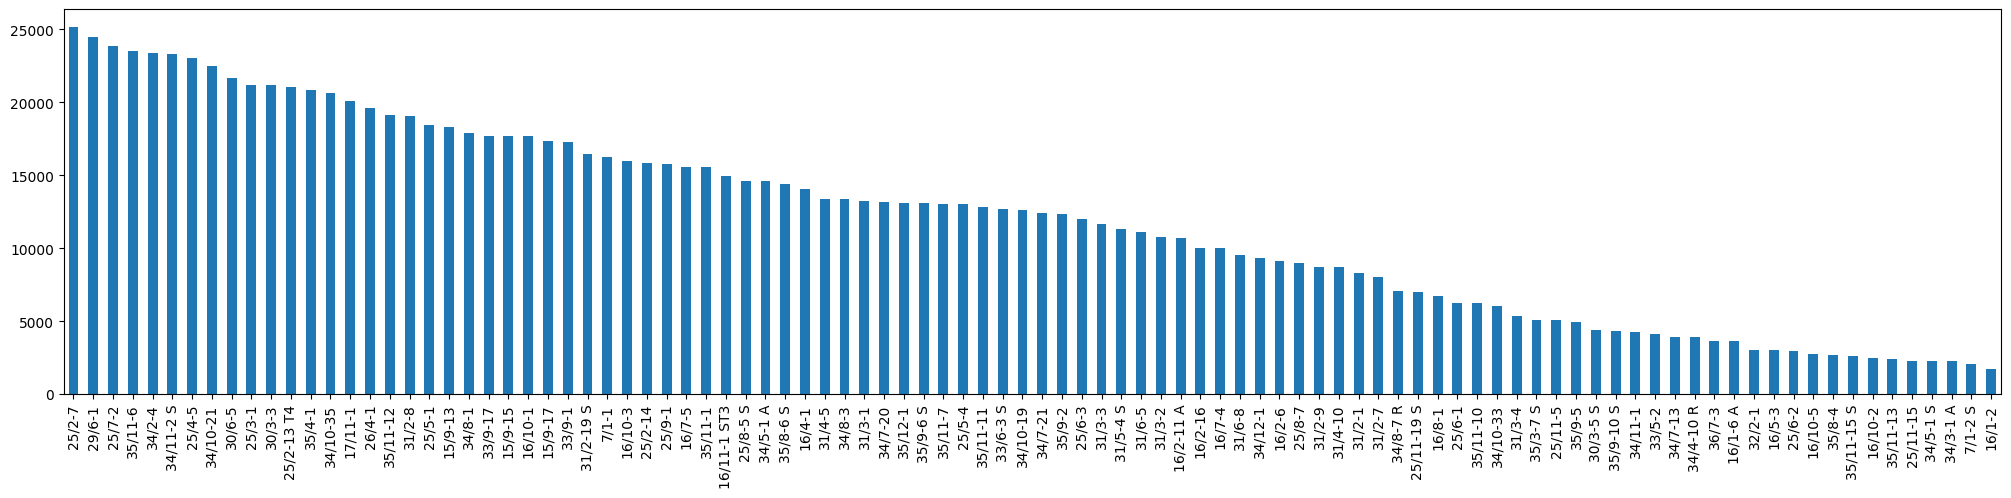

In [11]:
# The unique wells in the training and testing data are identified and plotted as bar charts, giving an idea of the distribution of wells in each dataset.
plt.figure(figsize = (25, 5))
well_train.WELL.value_counts().plot(kind = 'bar')
plt.show()

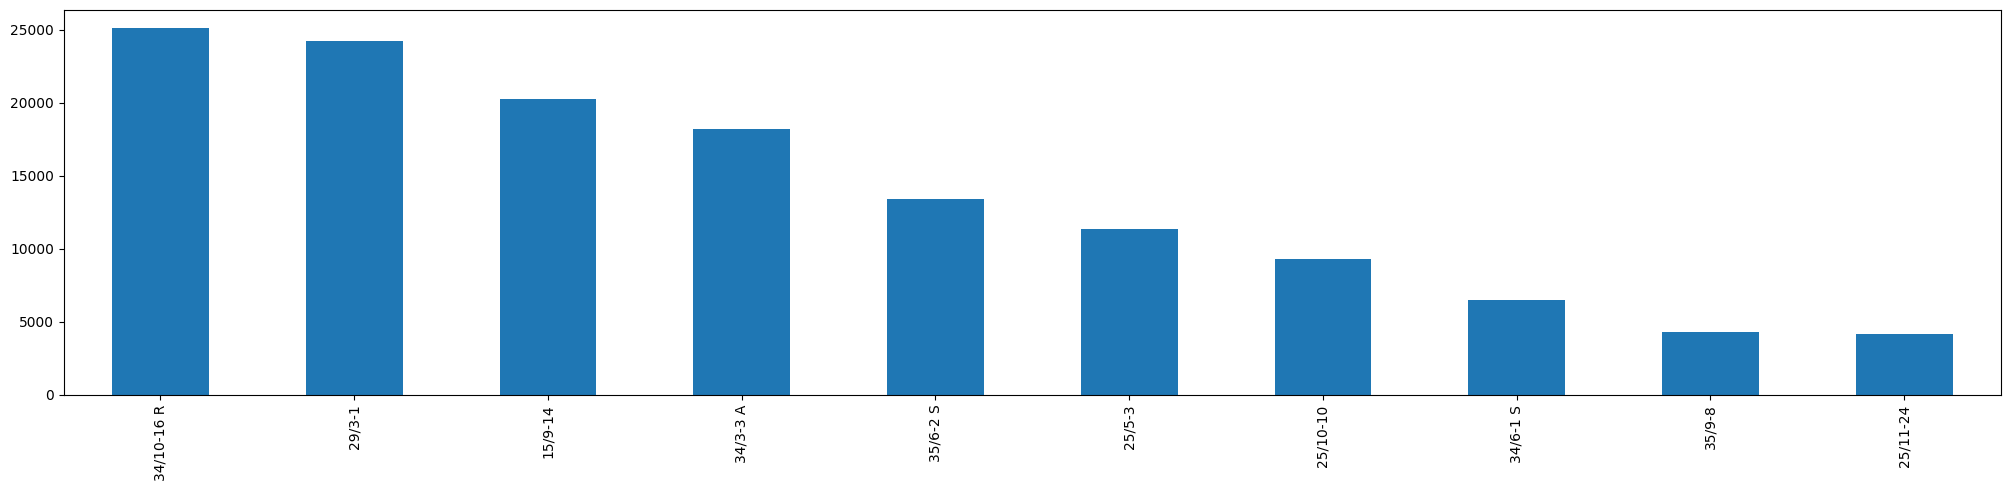

In [12]:
# The unique wells in the training and testing data are identified and plotted as bar charts, giving an idea of the distribution of wells in each dataset.
plt.figure(figsize = (25, 5))
well_test.WELL.value_counts().plot(kind = 'bar')
plt.show()

In [13]:
# The code extracts the names of the wells in each dataset and stores them in separate variables.
well_train_names = preprocessing.get_well_names(well_train)
well_test_names = preprocessing.get_well_names(well_test)

In [14]:
# It identifies any overlapping wells between the training and testing data, and prints the count and names of overlapping wells.
# This is important to ensure that if there are wells that are present in both the set.
overlapped_well_count, overlapped_well_name = preprocessing.get_overlapping_well(well_train, well_test)

Total numbers of testing wells overlapping in training wells: 0


In [15]:
# A random well from the training data is printed, giving a quick view of the data.
preprocessing.get_random_well(well_train, 2020).head()

Displaying information for Well 7/1-2 S


,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
1168471,7/1-2 S,2859.9924,444920.28125,6421580.5,-2799.143311,TYNE GP.,Mandal Fm.,8.728068,1.158282,1.141734,1.240302,NaN,257.011993,NaN,NaN,NaN,NaN,NaN,12.250001,29.118109,NaN,NaN,NaN,NaN,NaN,22.638025,NaN,65000,2.0
1168472,7/1-2 S,2860.1444,444920.28125,6421580.5,-2799.295410,TYNE GP.,Mandal Fm.,8.741534,1.122814,1.122354,1.229349,NaN,252.575577,NaN,NaN,NaN,NaN,NaN,12.250001,29.106216,NaN,NaN,NaN,NaN,NaN,23.431324,NaN,65000,2.0
1168473,7/1-2 S,2860.2964,444920.28125,6421580.5,-2799.447510,TYNE GP.,Mandal Fm.,8.739483,1.204416,1.208588,1.246152,NaN,263.705017,NaN,NaN,NaN,NaN,NaN,12.250001,29.087978,NaN,NaN,NaN,NaN,NaN,24.401089,NaN,65000,2.0
1168474,7/1-2 S,2860.4484,444920.28125,6421580.5,-2799.599609,TYNE GP.,Mandal Fm.,8.739040,1.213172,1.226264,1.235385,NaN,272.152985,NaN,NaN,NaN,NaN,NaN,12.250001,29.076694,NaN,NaN,NaN,NaN,NaN,25.371424,NaN,65000,2.0
1168475,7/1-2 S,2860.6004,444920.28125,6421580.5,-2799.751465,TYNE GP.,Mandal Fm.,8.744128,1.008474,1.013111,1.140845,NaN,270.512115,NaN,NaN,NaN,NaN,NaN,12.250001,29.061005,NaN,NaN,NaN,NaN,NaN,26.339930,NaN,65000,2.0


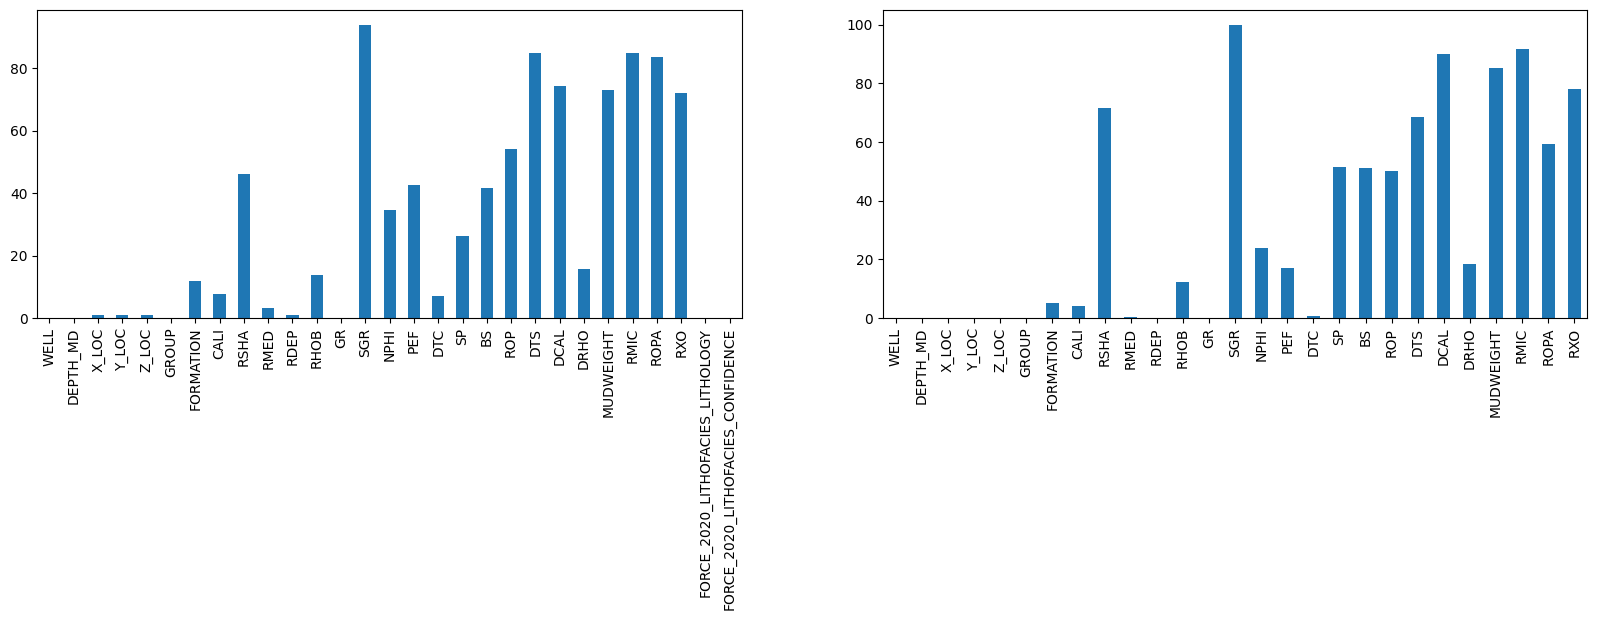

In [16]:
# The percentage of missing data for each column in both the training and testing data is calculated and plotted as bar charts, which is useful in identifying columns with high amounts of missing data.
percet_missing_train_data = preprocessing.percet_missing_data(well_train)
percet_missing_test_data = preprocessing.percet_missing_data(well_test)

_, ax = plt.subplots(1, 2, figsize = (20, 4))
percet_missing_train_data.plot(kind='bar', ax=ax[0])
percet_missing_test_data.plot(kind='bar', ax=ax[1])
plt.show()

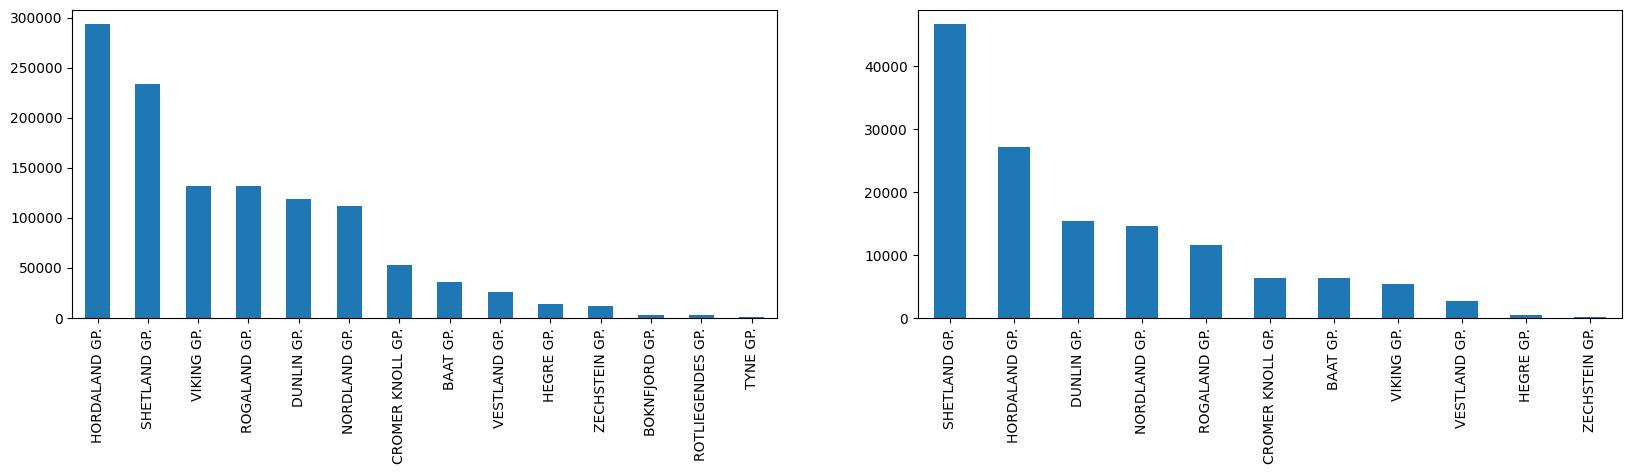

In [17]:
# The code identifies the unique groups in the training and testing data and prints a bar chart of the group distribution in each dataset. 
# This is important as the groups are the target variable in the machine learning model.
training_group = preprocessing.group_identification(well_train)
testing_group = preprocessing.group_identification(well_test)

training_group_names = training_group.index
testing_group_names = testing_group.index

_, ax = plt.subplots(1, 2, figsize = (20, 4))
training_group.plot(kind='bar', ax=ax[0])
testing_group.plot(kind='bar', ax=ax[1])
plt.show()

In [18]:
# It then identifies any non-overlapping groups between the training and testing data and prints the count and names of non-overlapping groups. 
# This is important to ensure that we don't have any groups in the test wells that ain't found in training wells.
nonoverlapped_groups_count, nonoverlapped_groups_name = preprocessing.get_nonoverlapping_groups(training_group_names, testing_group_names)

Total numbers of GROUPS in testing wells that is not overlapping in training wells: 0


In [19]:
# Finally, it checks for any missing group information in both the training and testing data, and prints the count of missing group information for each dataset. 
# This is important as missing group information needs to be imputed before the machine learning model can be trained.
preprocessing.missing_group_info(well_train)
preprocessing.missing_group_info(well_test)

Total data points with missing Group information: 1278
Total data points with missing Group information: 0


Displaying information for Well 25/6-2


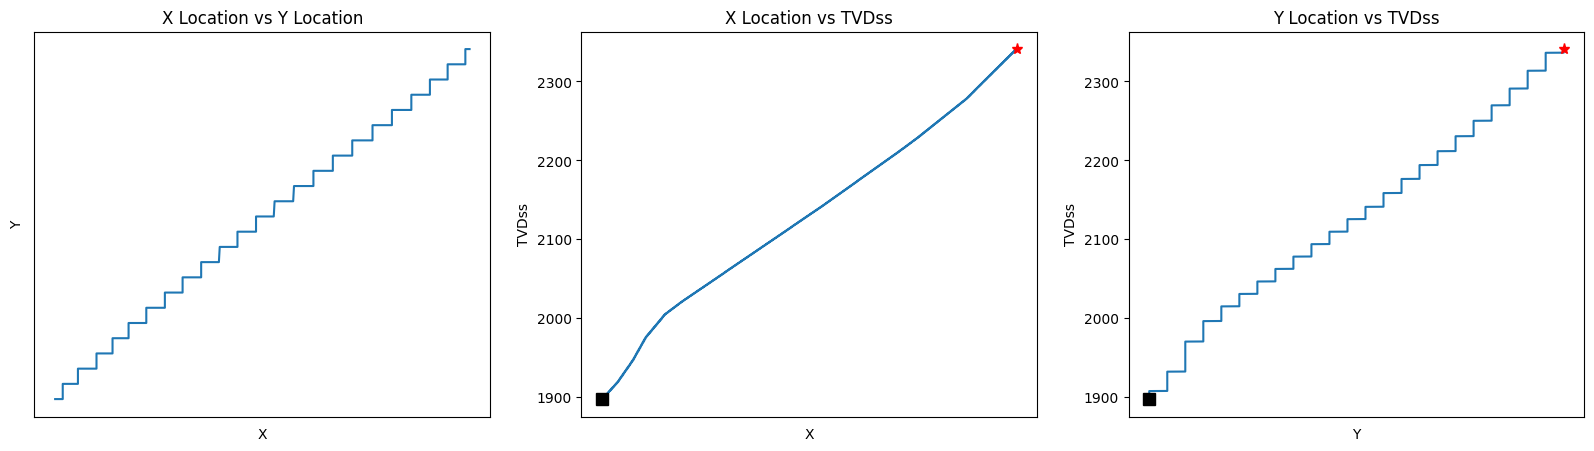

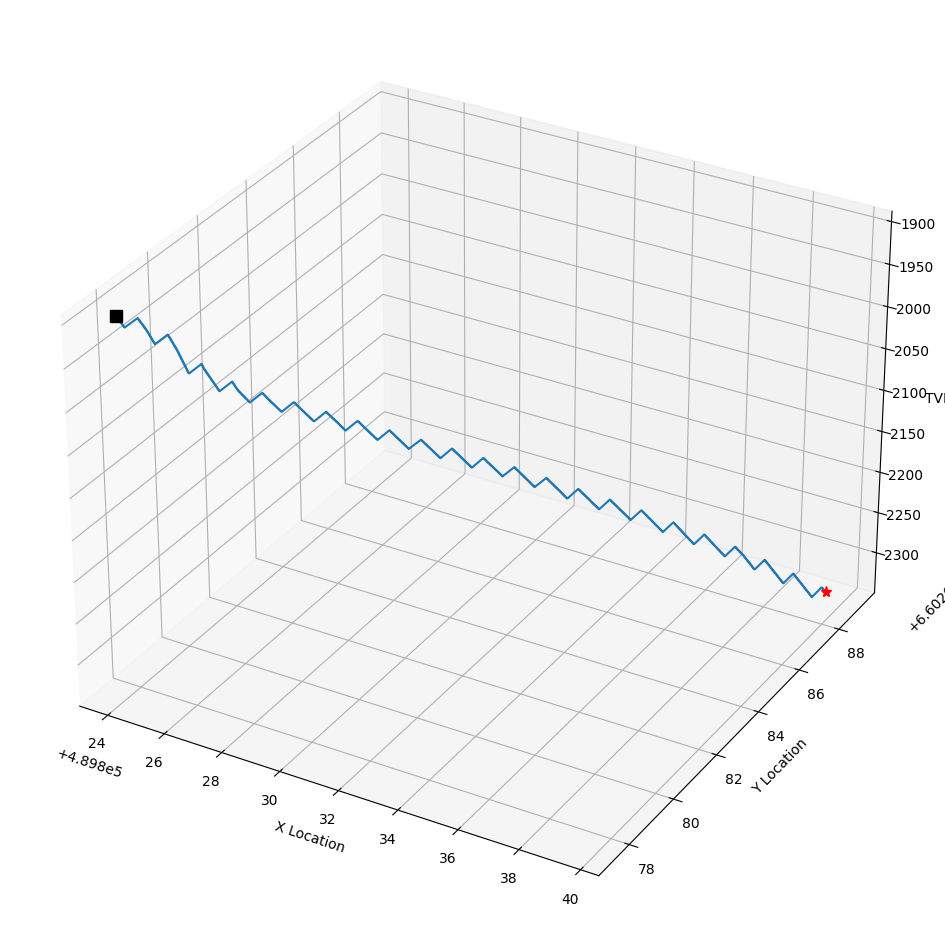

In [20]:
# Plots the trajectory of the random well
rand_well = preprocessing.get_random_well(well_train, 2023)
plot_utils.plot2Dlocation(rand_well)
plot_utils.plot3Dlocation(rand_well)

In [21]:
# It checks which wells have missing group information and how many datapoints are missing
well_train_with_missing_group_info = preprocessing.get_well_with_missing_group_info(well_train, total_training_wells, well_train_names)
well_test_with_missing_group_info = preprocessing.get_well_with_missing_group_info(well_test, total_testing_wells, well_test_names)

Well "35/11-6" is having missing information on GROUP and total data points missing this information is 32
Well "30/3-3" is having missing information on GROUP and total data points missing this information is 46
Well "31/3-1" is having missing information on GROUP and total data points missing this information is 48
Well "31/5-4 S" is having missing information on GROUP and total data points missing this information is 1152

Total 4 Wells have missing group information!

Total 0 Wells have missing group information!


# 5. Data Preprocessing

Data preprocessing is an important step in any data analysis project as it ensures that the data is accurate and ready for analysis. In this section, we perform several preprocessing steps on our dataset to clean and transform it.

A thorough data preprocessing step is crucial to ensure that the data is ready to be fed into machine learning models, which will produce accurate and reliable results.

Data processing step in this problem statemet:

- The first step is to remove the 'FORMATION' column from both the training and testing datasets. The 'FORMATION' column is not useful for our analysis, and removing it helps to simplify the dataset.

- Next, we fill missing 'GROUP' information for some wells in the training dataset using a custom function called 'fill_group_na_value'. The function uses the ffill method to infer the missing group value for the given well. We apply this function to four wells in our training dataset, as they have missing group information.

After filling the missing group information, we recheck the training dataset to ensure that no wells still have missing group information. This step is important to ensure that all wells have complete information for subsequent analysis.

Overall, these preprocessing steps help to clean and transform the dataset so that it is ready for analysis.

In [22]:
# Remove the 'FORMATION' column from both the training and testing datasets, as it is not useful for the analysis.
well_train = preprocessing.remove_formation_column(well_train)
well_test = preprocessing.remove_formation_column(well_test)

Removing FORMATION column from the dataset
Removing FORMATION column from the dataset


In [23]:
# Fill missing 'GROUP' information for some wells in the training dataset using a custom function called 'fill_group_na_value'. 
# The function uses the ffill method to infer the missing group value for the given well.
well_train.loc[well_train['WELL'] == well_train_with_missing_group_info[0], 'GROUP'] = preprocessing.fill_group_na_value(well_train, well_train_with_missing_group_info[0])
well_train.loc[well_train['WELL'] == well_train_with_missing_group_info[1], 'GROUP'] = preprocessing.fill_group_na_value(well_train, well_train_with_missing_group_info[1])
well_train.loc[well_train['WELL'] == well_train_with_missing_group_info[2], 'GROUP'] = preprocessing.fill_group_na_value(well_train, well_train_with_missing_group_info[2])
well_train.loc[well_train['WELL'] == well_train_with_missing_group_info[3], 'GROUP'] = preprocessing.fill_group_na_value(well_train, well_train_with_missing_group_info[3])

In [24]:
# Recheck if any wells in the training dataset still have missing 'GROUP' information, and print their names if any. 
# This step is important to ensure that all wells have complete information for subsequent analysis.
preprocessing.get_well_with_missing_group_info(well_train, total_training_wells, well_train_names)


Total 0 Wells have missing group information!


[]

Displaying information for Well 31/6-5


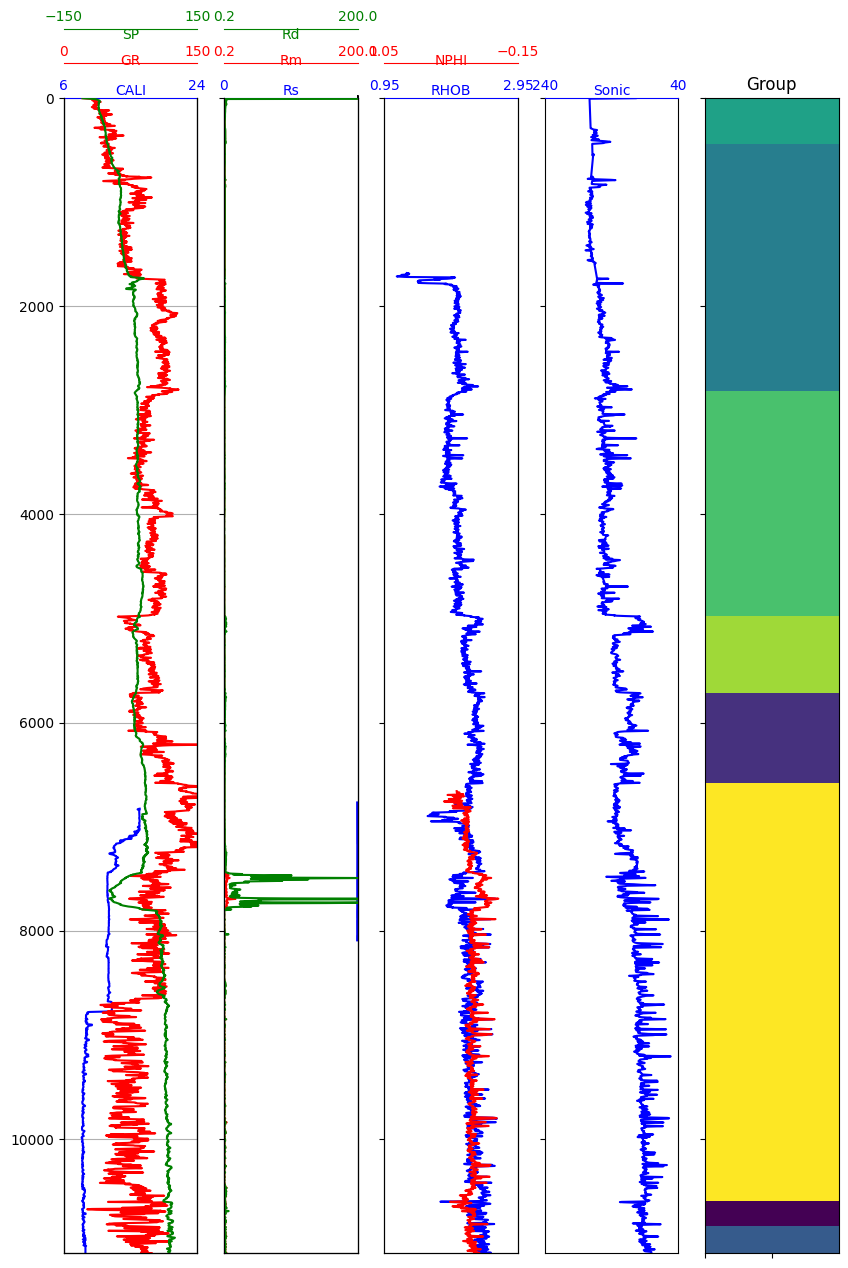

In [25]:
# Plot a log plot for a randomly selected well from the training dataset, using a custom function called 'log_plot'. 
# This plot is a useful visualization for detecting anomalies in the well logs, which can help in identifying bad data points that need to be cleaned.
plot_utils.log_plot(well_train[well_train['WELL'] == preprocessing.get_random_well(well_train, 2000)['WELL'].unique()[0]])

# 6. Generating Dataset

In [26]:
start_well=30
end_well=31
save_path = '../data' if os.path.isdir('../data') else 'data'
img_save_path = pjoin(save_path, 'img')
gt_save_path = pjoin(save_path, 'gt')

os.makedirs(save_path, exist_ok = True)
os.makedirs(img_save_path, exist_ok = True)
os.makedirs(gt_save_path, exist_ok = True)

In [27]:
def generate_dataset(well_train, well_train_names, start_well, end_well, img_save_path, gt_save_path, plot_type):
    """Generates a dataset of images and ground truth files.

    Args:
        well_train (pandas.DataFrame): The training well data.
        well_train_names (list of str): The names of the training wells.
        start_well (int): The index of the first well to include.
        end_well (int): The index of the last well to include.
        plot_type (str): The type of plots to generate. Must be one of: 'normal', 'random', 'invert'.
        img_save_path (str): The path to save the generated images.
        gt_save_path (str): The path to save the generated ground truth files.

    Returns:
        None
    """
    for j in range(start_well,end_well,1):
        well_shape = len(well_train[well_train['WELL'] == well_train_names[j]])
        for i in tqdm(range(0, well_shape, 350)):
            if plot_type == 'normal':
                prefix = ""
            elif plot_type == 'random':
                randomlist = data_generate.randon_list_generator()
                prefix = "random_"
            elif plot_type == 'invert':
                prefix = "invert_"
            else:
                print(f"Select plot_type from [normal, random, invert]. plot_type {plot_type} doesn't exist")
                return

            plotname = pjoin(img_save_path, prefix+"well_"+str(j)+"_"+str(i)+".jpg")
            txtname = pjoin(gt_save_path, prefix+"well_"+str(j)+"_"+str(i)+".csv")

            if i+700 > well_shape:
                well_not700 = well_shape-i
                if plot_type == 'normal':
                    data_generate.log_plot_image(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i-(700-well_not700),700)
                elif plot_type == 'random':
                    data_generate.log_plot_image_random(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i-(700-well_not700),700, randomlist,well_train,well_train_names)
                elif plot_type == 'invert':
                    data_generate.log_plot_image_invert(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i-(700-well_not700),700)
                else:
                    print(f"Select plot_type from [normal, random, invert]. plot_type {plot_type} doesn't exist")
                    return
            else:
                if plot_type == 'normal':
                    data_generate.log_plot_image(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i,700)
                elif plot_type == 'random':
                    data_generate.log_plot_image_random(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i,700, randomlist,well_train,well_train_names)
                elif plot_type == 'invert':
                    data_generate.log_plot_image_invert(well_train[well_train['WELL'] == well_train_names[0]],plotname,txtname,i,700)
                else:
                    print(f"Select plot_type from [normal, random, invert]. plot_type {plot_type} doesn't exist")
                    return

In [28]:
generate_dataset(well_train, well_train_names, start_well, end_well, img_save_path, gt_save_path, plot_type = 'normal')

100%|██████████| 45/45 [00:22<00:00,  1.97it/s]


In [29]:
generate_dataset(well_train, well_train_names, start_well, end_well, img_save_path, gt_save_path, plot_type = 'random')

100%|██████████| 45/45 [01:05<00:00,  1.45s/it]


In [30]:
generate_dataset(well_train, well_train_names, start_well, end_well, img_save_path, gt_save_path, plot_type = 'invert')

100%|██████████| 45/45 [00:23<00:00,  1.92it/s]
